In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
inputs = df.drop('salary_more_than_100k',axis='columns')

In [7]:
target = df['salary_more_than_100k']

In [9]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [12]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [13]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [14]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [15]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [16]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size = 0.2)

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_test, y_test)

0.75

In [24]:
model.predict([[2,1,0]])

/Users/avigyarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
model.predict([[2,1,1]])

/Users/avigyarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.3, 0.625, 'X[0] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.2, 0.375, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.625, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'X[0] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

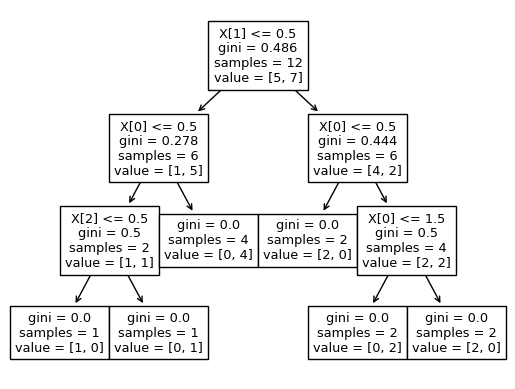

In [39]:
tree.plot_tree(model)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [44]:
model.score(X_test, y_test)

1.0